<a href="https://colab.research.google.com/github/IngDiegoSosa/ACE-AB1/blob/main/ACE_AB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACE-AB1: Automated Comprehensive Editing and BLAST-based Assignment for AB1 files
*Diego Sosa Reyes, Gerardo R. Amores*


---

ACE-AB1 is a powerful tool that ensures high-quality sequence analysis and reduces the risk of low-quality submissions to public databases. By integrating accessibility, efficiency, and adaptability, the tool supports the integrity of genomic research while democratizing access to reliable sequence processing methods. Its design makes it an indispensable asset for researchers, educators, and laboratories worldwide.

## Workflow

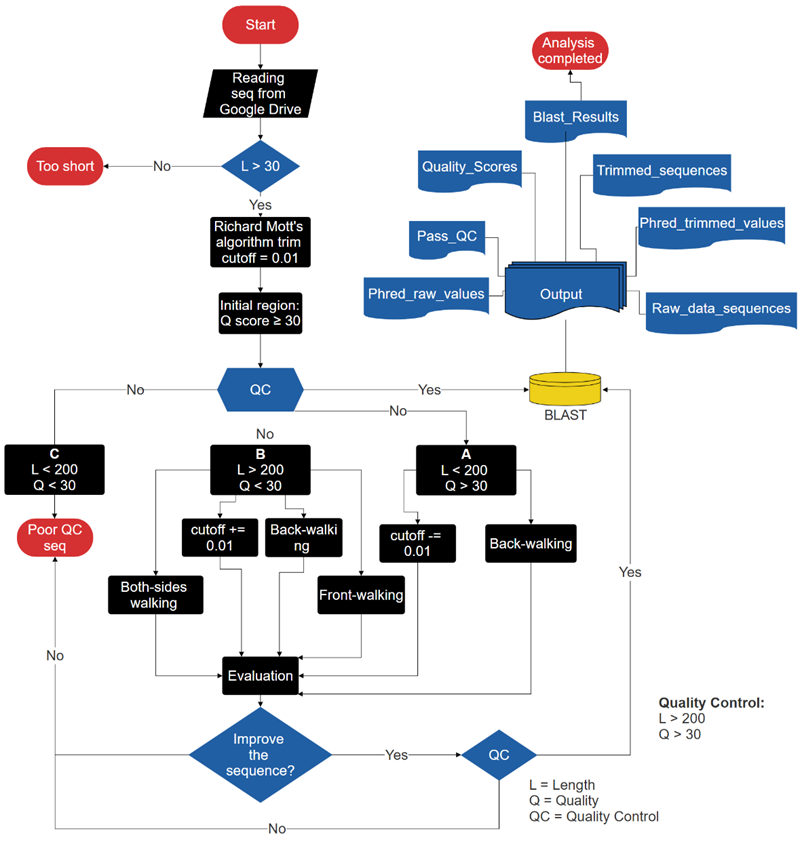

FIGURE 1. Implementation insights. The systematic workflow for high-quality sequence evaluation and selection is shown.

# Step-by-Step Instructions

1. **Prepare Google Drive:**
* Open Google Drive.
* Create two folders named “input” and “output” in your Drive.
* Upload AB1 files to the “input” folder.

2. **Run the Script:**
* Execute the script by clicking the play button.
* Adjust parameters if needed (e.g., QC thresholds) and proceed with BLAST analysis.

3. **Retrieve Results:**
* Navigate to the “output” folder in Google Drive.
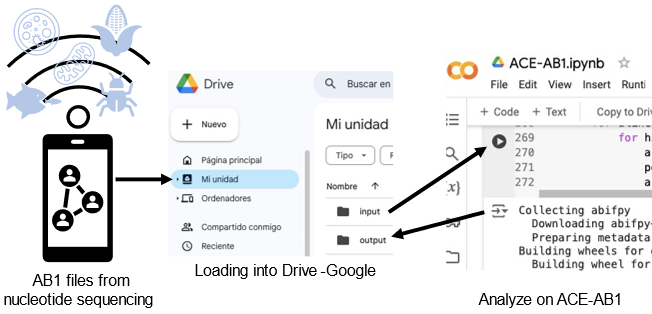

Figure 2. Script execution process. The AB1 files generated by Capillary Electrophoreses based sequencing platform are loaded into Drive-google at “input” folder. The ACE-AB1 script is downloaded at GitHub (link) and saved at Colab-Google. Analysis is performed by clicking the play button. Results are accessible at the “output” folder from Drive.

Video Tutorial: https://drive.google.com/file/d/1y3iERQXxvyhUBMn5pcR3oQBasJpvA0xL/view?usp=drive_link

In [ ]:
!pip install abifpy
!pip install biopython
import os
from os import chdir, listdir,getcwd
from abifpy import Trace
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from google.colab import drive
drive.mount('/content/drive')

def trim_sequence_and_quality(seq, qual, cutoff):
    trimmed_seq = chrom.trim(seq, cutoff=cutoff)
    start_index = seq.find(trimmed_seq)
    end_index = start_index + len(trimmed_seq)
    trimmed_qual = qual[start_index:end_index]
    return trimmed_seq, trimmed_qual

chdir('/content/drive/MyDrive/')
Trimmed_sequences = open("output/Trimmed_sequences.seq","w")
Raw_data_sequences = open("output/Raw_data_sequences.seq","w")
Quality_Scores = open("output/Quality_Scores.seq","w")
Phred_trimmed_sequence_values = open("output/Phred_trimmed_sequence_values.seq","w")
Phred_raw_values = open("output/Phred_raw_values.seq","w")
Pass_QC = open("output/Pass_QC.seq","w")
chdir('/content/drive/MyDrive/input/')

total = 0
buenas = 0
malas = 0
dudosas = 0
resultados = []
print(f"\nIniciando análisis...\n")
for f in listdir(getcwd()):
    corte_final = 10
    corte = 0
    promedio = 0
    total += 1
    chrom = Trace(f)
    seq = chrom.seq
    qual = chrom.qual_val
    Raw_data_sequences.write('>' + f[:-4] + '\n')
    Raw_data_sequences.write(seq + '\n')
    Phred_raw_values.write('>' + f[:-4] + '\n')
    qual_str = ' '.join(map(str, qual))
    Phred_raw_values.write(qual_str + '\n')
    cutoff = 0.01
    if len(seq) > 30:
        print(f"Analizando: {f}.")
        trimmed_seq, trimmed_qual = trim_sequence_and_quality(seq, qual, cutoff)
        while promedio < 30 and corte < 40:
          promedio = sum(trimmed_qual[corte:corte_final]) / len(trimmed_qual[corte:corte_final]) if len(trimmed_qual[corte:corte_final]) > 0 else 0
          if promedio < 30:
            corte += 1
            corte_final += 1

        final = len(trimmed_qual[corte:])
        promedio_qual = sum(trimmed_qual[corte:final]) / len(trimmed_qual[corte:final]) if len(trimmed_qual[corte:final]) > 0 else 0
        count_1 = sum(1 for q in trimmed_qual[corte:final] if 1 <= q <= 15)
        count_2 = sum(1 for q in trimmed_qual[corte:final] if 16 <= q <= 39)
        count_3 = sum(1 for q in trimmed_qual[corte:final] if 40 <= q <= 100)
        total_count = len(trimmed_qual[corte:final])
        percent_1 = (count_1 / total_count) * 100 if total_count > 0 else 0
        percent_2 = (count_2 / total_count) * 100 if total_count > 0 else 0
        percent_3 = (count_3 / total_count) * 100 if total_count > 0 else 0
        if percent_3 > 25 and percent_1 < 17 and len(trimmed_qual[corte:final]) > 200:
            etiqueta = "Buena"
        elif percent_3 < 25 and percent_1 > 15 or len(trimmed_qual[corte:final]) <= 200:
            etiqueta = "Mala"
        elif percent_3 < 25 and percent_1 < 15 and percent_2 > 45 and len(trimmed_qual[corte:final]) > 200:
            etiqueta = "Dudosa"
        else:
            etiqueta = "Indefinida"

        if len(trimmed_qual[corte:final]) < 200 and (promedio_qual > 30) and len(trimmed_qual[corte:final]) > 0:
          print(f"Ajustando parametros y analizando nuevamente: {f}.")
          corte_200 = corte
          while len(trimmed_qual[corte_200:final]) < 200 and (promedio_qual > 30) and len(trimmed_qual[corte_200:final]) > 0 and corte_200 >= 0:
              corte_200 -= 1
              promedio_qual = sum(trimmed_qual[corte_200:final]) / len(trimmed_qual[corte_200:final]) if len(trimmed_qual[corte_200:final]) > 0 else 0
              count_1 = sum(1 for q in trimmed_qual[corte_200:final] if 1 <= q <= 15)
              count_2 = sum(1 for q in trimmed_qual[corte_200:final] if 16 <= q <= 39)
              count_3 = sum(1 for q in trimmed_qual[corte_200:final] if 40 <= q <= 100)
              total_count = len(trimmed_qual[corte_200:final])
              percent_1 = (count_1 / total_count) * 100 if total_count > 0 else 0
              percent_2 = (count_2 / total_count) * 100 if total_count > 0 else 0
              percent_3 = (count_3 / total_count) * 100 if total_count > 0 else 0
              if percent_3 > 25 and percent_1 < 17 and len(trimmed_qual[corte_200:final]) > 200:
                  etiqueta = "Buena"
              elif percent_3 < 25 and percent_1 > 15 or len(trimmed_qual[corte_200:final]) <= 200:
                  etiqueta = "Mala"
              elif percent_3 < 25 and percent_1 < 15 and percent_2 > 45 and len(trimmed_qual[corte_200:final]) > 200:
                  etiqueta = "Dudosa"
              else:
                  etiqueta = "Indefinida"
          while len(trimmed_qual[corte:final]) < 200 and (promedio_qual > 30) and len(trimmed_qual[corte:final]) > 0 and cutoff > 0.001 and cutoff < 0.2:
              cutoff -= 0.01
              trimmed_seq, trimmed_qual = trim_sequence_and_quality(seq, qual, cutoff)
              promedio_qual = sum(trimmed_qual[corte:final]) / len(trimmed_qual[corte:final]) if len(trimmed_qual[corte:final]) > 0 else 0
              count_1 = sum(1 for q in trimmed_qual[corte:final] if 1 <= q <= 15)
              count_2 = sum(1 for q in trimmed_qual[corte:final] if 16 <= q <= 39)
              count_3 = sum(1 for q in trimmed_qual[corte:final] if 40 <= q <= 100)
              total_count = len(trimmed_qual[corte:final])
              percent_1 = (count_1 / total_count) * 100 if total_count > 0 else 0
              percent_2 = (count_2 / total_count) * 100 if total_count > 0 else 0
              percent_3 = (count_3 / total_count) * 100 if total_count > 0 else 0
              if percent_3 > 25 and percent_1 < 17 and len(trimmed_qual[corte:final]) > 200:
                  etiqueta = "Buena"
              elif percent_3 < 25 and percent_1 > 15 or len(trimmed_qual[corte:final]) <= 200:
                  etiqueta = "Mala"
              elif percent_3 < 25 and percent_1 < 15 and percent_2 > 45 and len(trimmed_qual[corte:final]) > 200:
                  etiqueta = "Dudosa"
              else:
                  etiqueta = "Indefinida"

        if len(trimmed_qual[corte:final]) > 200 and (etiqueta == "Dudosa" or etiqueta == "Mala" or promedio_qual < 30) and cutoff > 0.001 and cutoff < 0.2:
          print(f"Ajustando parametros y analizando nuevamente: {f}.")
        while len(trimmed_qual[corte:final]) > 200 and (etiqueta == "Dudosa" or etiqueta == "Mala" or promedio_qual < 30) and cutoff > 0.001 and cutoff < 0.2:
            cutoff += 0.01
            trimmed_seq, trimmed_qual = trim_sequence_and_quality(seq, qual, cutoff)
            promedio_qual = sum(trimmed_qual[corte:final]) / len(trimmed_qual[corte:final]) if len(trimmed_qual[corte:final]) > 0 else 0
            count_1 = sum(1 for q in trimmed_qual[corte:final] if 1 <= q <= 15)
            count_2 = sum(1 for q in trimmed_qual[corte:final] if 16 <= q <= 39)
            count_3 = sum(1 for q in trimmed_qual[corte:final] if 40 <= q <= 100)
            total_count = len(trimmed_qual[corte:final])
            percent_1 = (count_1 / total_count) * 100 if total_count > 0 else 0
            percent_2 = (count_2 / total_count) * 100 if total_count > 0 else 0
            percent_3 = (count_3 / total_count) * 100 if total_count > 0 else 0
            if percent_3 > 25 and percent_1 < 17 and len(trimmed_qual[corte:final]) > 200:
                etiqueta = "Buena"
            elif percent_3 < 25 and percent_1 > 15 or len(trimmed_qual[corte:final]) <= 200:
                etiqueta = "Mala"
            elif percent_3 < 25 and percent_1 < 15 and percent_2 > 45 and len(trimmed_qual[corte:final]) > 200:
                etiqueta = "Dudosa"
            else:
                etiqueta = "Indefinida"

        corte_nuevo = corte
        if len(trimmed_qual[corte_nuevo:]) > 200 and (etiqueta == "Dudosa" or etiqueta == "Mala" or promedio_qual < 30) :
          print(f"Ajustando porción inicial y analizando nuevamente: {f}.")
        while len(trimmed_qual[corte_nuevo:]) > 200 and (etiqueta == "Dudosa" or etiqueta == "Mala" or promedio_qual < 30) :
          corte_nuevo += 1
          trimmed_seq, trimmed_qual = trim_sequence_and_quality(seq, qual, cutoff)
          promedio_qual = sum(trimmed_qual[corte_nuevo:]) / len(trimmed_qual[corte_nuevo:]) if len(trimmed_qual[corte_nuevo:]) > 0 else 0
          if promedio_qual >= 30:
            corte = corte_nuevo
          count_1 = sum(1 for q in trimmed_qual[corte_nuevo:] if 1 <= q <= 15)
          count_2 = sum(1 for q in trimmed_qual[corte_nuevo:] if 16 <= q <= 39)
          count_3 = sum(1 for q in trimmed_qual[corte_nuevo:] if 40 <= q <= 100)
          total_count = len(trimmed_qual[corte_nuevo:])
          percent_1 = (count_1 / total_count) * 100 if total_count > 0 else 0
          percent_2 = (count_2 / total_count) * 100 if total_count > 0 else 0
          percent_3 = (count_3 / total_count) * 100 if total_count > 0 else 0
          if percent_3 > 25 and percent_1 < 17 and len(trimmed_qual[corte_nuevo:]) > 200:
              etiqueta = "Buena"
          elif percent_3 < 25 and percent_1 > 15 or len(trimmed_qual[corte_nuevo:]) <= 200:
              etiqueta = "Mala"
          elif percent_3 < 25 and percent_1 < 15 and percent_2 > 45 and len(trimmed_qual[corte_nuevo:]) > 200:
              etiqueta = "Dudosa"
          else:
              etiqueta = "Indefinida"

        final_nuevo = final
        if len(trimmed_qual[corte:final_nuevo]) > 200 and (etiqueta == "Dudosa" or etiqueta == "Mala" or promedio_qual < 30):
          print(f"Ajustando porción final y analizando nuevamente: {f}.")
        while len(trimmed_qual[corte:final_nuevo]) > 200 and (etiqueta == "Dudosa" or etiqueta == "Mala" or promedio_qual < 30):
          final_nuevo -= 1
          trimmed_seq, trimmed_qual = trim_sequence_and_quality(seq, qual, cutoff)
          promedio_qual = sum(trimmed_qual[corte:final_nuevo]) / len(trimmed_qual[corte:final_nuevo]) if len(trimmed_qual[corte:final_nuevo]) > 0 else 0
          if promedio_qual >= 30:
            final = final_nuevo
          count_1 = sum(1 for q in trimmed_qual[corte:final] if 1 <= q <= 15)
          count_2 = sum(1 for q in trimmed_qual[corte:final] if 16 <= q <= 39)
          count_3 = sum(1 for q in trimmed_qual[corte:final] if 40 <= q <= 100)
          total_count = len(trimmed_qual[corte:final])
          percent_1 = (count_1 / total_count) * 100 if total_count > 0 else 0
          percent_2 = (count_2 / total_count) * 100 if total_count > 0 else 0
          percent_3 = (count_3 / total_count) * 100 if total_count > 0 else 0
          if percent_3 >= 25 and percent_1 <= 17 and len(trimmed_qual[corte:final]) > 200:
              etiqueta = "Buena"
          elif percent_3 < 25 and percent_1 > 15 or len(trimmed_qual[corte:final]) <= 200:
              etiqueta = "Mala"
          elif percent_3 < 25 and percent_1 < 15 and percent_2 > 45 and len(trimmed_qual[corte:final]) > 200:
              etiqueta = "Dudosa"
          else:
              etiqueta = "Indefinida"

        final_nuevo = final
        corte_nuevo = corte
        if len(trimmed_qual[corte_nuevo:final_nuevo]) > 200 and (etiqueta == "Dudosa" or etiqueta == "Mala" or promedio_qual < 30):
          print(f"Ajustando ambas porciones  y analizando nuevamente: {f}.")
        while len(trimmed_qual[corte_nuevo:final_nuevo]) > 200 and (etiqueta == "Dudosa" or etiqueta == "Mala" or promedio_qual < 30):
          final_nuevo -= 1
          corte_nuevo += 1
          trimmed_seq, trimmed_qual = trim_sequence_and_quality(seq, qual, cutoff)
          promedio_qual = sum(trimmed_qual[corte_nuevo:final_nuevo]) / len(trimmed_qual[corte_nuevo:final_nuevo]) if len(trimmed_qual[corte_nuevo:final_nuevo]) > 0 else 0
          if promedio_qual >= 30:
            corte = corte_nuevo
            final = final_nuevo
          count_1 = sum(1 for q in trimmed_qual[corte:final] if 1 <= q <= 15)
          count_2 = sum(1 for q in trimmed_qual[corte:final] if 16 <= q <= 39)
          count_3 = sum(1 for q in trimmed_qual[corte:final] if 40 <= q <= 100)
          total_count = len(trimmed_qual[corte:final])
          percent_1 = (count_1 / total_count) * 100 if total_count > 0 else 0
          percent_2 = (count_2 / total_count) * 100 if total_count > 0 else 0
          percent_3 = (count_3 / total_count) * 100 if total_count > 0 else 0
          if percent_3 >= 25 and percent_1 <= 17 and len(trimmed_qual[corte:final]) > 200:
              etiqueta = "Buena"
          elif percent_3 < 25 and percent_1 > 15 or len(trimmed_qual[corte:final]) <= 200:
              etiqueta = "Mala"
          elif percent_3 < 25 and percent_1 < 15 and percent_2 > 45 and len(trimmed_qual[corte:final]) > 200:
              etiqueta = "Dudosa"
          else:
              etiqueta = "Indefinida"

        if etiqueta == "Indefinida" and promedio_qual > 30:
          etiqueta = "Buena"
        if etiqueta == "Indefinida" and promedio_qual < 30:
          etiqueta = "Mala"
        if etiqueta == "Buena":
          buenas += 1
        if etiqueta == "Mala":
          malas += 1
        if etiqueta == "Dudosa":
          dudosas += 1
        if etiqueta == "Indefinida":
          dudosas += 1

        if etiqueta in ["Buena", "Dudosa"]:
            Pass_QC.write('>' + f[:-4] + '\n')
            Pass_QC.write(trimmed_seq[corte:final] + '\n')
        Trimmed_sequences.write('>' + f[:-4] + '\n')
        Trimmed_sequences.write(trimmed_seq[corte:final] + '\n')
        Phred_trimmed_sequence_values.write('>' + f[:-4] + '\n')
        qual_seqs = ' '.join(map(str, trimmed_qual[corte:final])) + '\n'
        Phred_trimmed_sequence_values.write(qual_seqs)

        if etiqueta == "Mala" and len(trimmed_qual[corte:final]) == 0:
          promedio = sum(qual) / len(qual) if len(qual) > 0 else 0
          resultados.append(f'\n>{f[:-4]}\nLongitud: {len(qual)}\nCalidad: {etiqueta}\n'
                          f'Valores de calidad entre 1 y 15: {count_1} ({percent_1:.2f}%)\n'
                          f'Valores de calidad entre 16 y 39: {count_2} ({percent_2:.2f}%)\n'
                          f'Valores de calidad entre corte y 100: {count_3} ({percent_3:.2f}%)\n'
                          f'Promedio de calidad: {promedio:.2f}\n')
        else:
          resultados.append(f'\n>{f[:-4]}\nLongitud: {len(trimmed_qual[corte:final])}\nCalidad: {etiqueta}\n'
                            f'Valores de calidad entre 1 y 15: {count_1} ({percent_1:.2f}%)\n'
                            f'Valores de calidad entre 16 y 39: {count_2} ({percent_2:.2f}%)\n'
                            f'Valores de calidad entre corte y 100: {count_3} ({percent_3:.2f}%)\n'
                            f'Promedio de calidad: {promedio_qual:.2f}\n')

    else:
        print(f"La secuencia {f} es demasiado corta para recortarla.")

Quality_Scores.write(f'Cantidad total de secuencias analizadas: {total}\n')
Quality_Scores.write(f'Cantidad de secuencias buenas: {buenas}\n')
Quality_Scores.write(f'Cantidad de secuencias malas: {malas}\n')
Quality_Scores.write(f'Cantidad de secuencias dudosas: {dudosas}\n')

for resultado in resultados:
    Quality_Scores.write(resultado)
Trimmed_sequences.close()
Phred_trimmed_sequence_values.close()
Raw_data_sequences.close()
Phred_raw_values.close()
Quality_Scores.close()
Pass_QC.close()

print(f'\nCantidad total de secuencias analizadas: {total}')
print(f'Cantidad de secuencias buenas: {buenas}')
print(f'Cantidad de secuencias malas: {malas}')
print(f'Cantidad de secuencias dudosas: {dudosas}')

print("\nSecuencias analizadas, iniciando BLAST.")

os.chdir('/content/drive/MyDrive/output/')
with open("Pass_QC.seq") as secuencia_fasta:
    secuencias = secuencia_fasta.read()

resultado_blast = NCBIWWW.qblast(
    program="blastn",
    database="nt",
    sequence=secuencias,
    megablast=True,
    expect=0.01,
    hitlist_size=5)
registros_blast = NCBIXML.parse(resultado_blast)
with open("BLAST_Results.txt", "w") as archivo_txt:
    for registro in registros_blast:
        archivo_txt.write(f"\nAnalizando: {registro.query}\n")
        for alineacion in registro.alignments:
            for hsp in alineacion.hsps:
                archivo_txt.write(f"Descripción: {alineacion.title}\n")
                porcentaje_identidad = (hsp.identities / hsp.align_length) * 100
                archivo_txt.write(f"Porcentaje de identidad: {porcentaje_identidad:.2f}%\n")
print("\nBLAST completado, análisis terminado.")

# Results
A folder with seven text files:
* **BLAST_results:** Sequences passing QC and their BLAST identities.
* **Pass_QC:** High-quality sequences submitted to BLAST.
* **Quality_Scores:** QC metrics for all sequences.
* **Trimmed_sequences:** Analyzed sequences, regardless of QC status.
* **Phred_trimmed_sequence_values:** Phred scores for trimmed sequences.
* **Raw_data_sequences:** Unprocessed sequences.
* **Phred_raw_values:** Phred scores for raw sequences.
